In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [2]:
# Function to estimate Gaussian parameters (mean and variance)
def estimate_gaussian(X):
    m,n=X.shape
    mu=np.zeros((1,n))
    sigma2=np.zeros((n,1))
    p=np.zeros_like((X))
    # Calculate mean and variance
    mu=(1/m)*np.sum(X,axis=0)
    sigma2=(1/m)*np.sum((X-mu)**2,axis=0)
    return mu,sigma2

In [3]:
# Function to compute the probability density of multivariate Gaussian
def multivariate_gaussian(X, mu, sigma2):
    k = len(mu)
    if sigma2.ndim == 1:
        sigma2 = np.diag(sigma2)
    X_minus_mu = X - mu
    p = (2 * np.pi) ** (-k / 2) * np.linalg.det(sigma2) ** (-0.5) * \
        np.exp(-0.5 * np.sum(X_minus_mu.dot(np.linalg.pinv(sigma2)) * X_minus_mu, axis=1))
    return p


In [4]:
# Function to visualize Gaussian fit
def visualize_fit(X, mu, sigma2):
    x1, x2 = np.meshgrid(np.arange(0, 35.5, 0.5), np.arange(0, 35.5, 0.5))
    X_grid = np.column_stack((x1.ravel(), x2.ravel()))
    Z = multivariate_gaussian(X_grid, mu, sigma2)
    Z = Z.reshape(x1.shape)

    plt.plot(X[:, 0], X[:, 1], 'bx')
    plt.contour(x1, x2, Z, levels=10.0**np.arange(-20, 1, 3))
    plt.xlabel('Latency (ms)')
    plt.ylabel('Throughput (mb/s)')
    plt.show()

In [5]:
# Function to select the threshold
def select_threshold(yval, pval):
    best_epsilon = 0
    best_f1 = 0
    stepsize = (np.max(pval) - np.min(pval)) / 1000

    for epsilon in np.arange(np.min(pval), np.max(pval), stepsize):
        cv_predictions = pval < epsilon
        tp = np.sum((cv_predictions == 1) & (yval == 1))
        fp = np.sum((cv_predictions == 1) & (yval == 0))
        fn = np.sum((cv_predictions == 0) & (yval == 1))

        precision = tp / (tp + fp)
        recall = tp / (tp + fn)

        f1 = 2 * precision * recall / (precision + recall)

        if f1 > best_f1:
            best_f1 = f1
            best_epsilon = epsilon

    return best_epsilon, best_f1

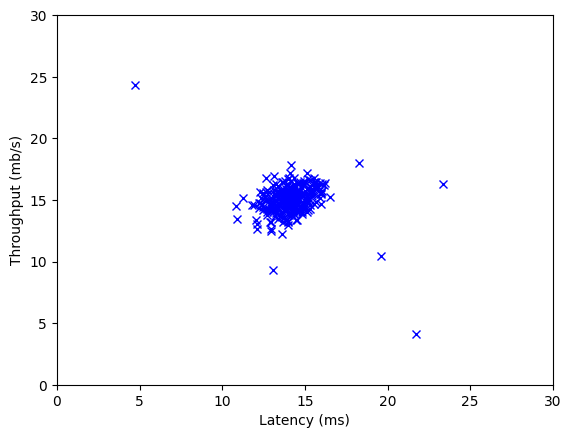

In [6]:

# Load data
data1 = loadmat('ex8data1.mat')
X = data1['X']
Xval = data1['Xval']
yval = data1['yval'].flatten()

#Visualize Example Dataset
plt.figure()
plt.plot(X[:, 0], X[:, 1], 'bx')
plt.axis([0, 30, 0, 30])
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.show()

In [7]:
# Estimate Gaussian parameters
mu, sigma2 = estimate_gaussian(X)

#  Find Outliers
p = multivariate_gaussian(X, mu, sigma2)
pval = multivariate_gaussian(Xval, mu, sigma2)
epsilon, f1 = select_threshold(yval, pval)

print(f'Best epsilon found using cross-validation: {epsilon:.2e}')
print(f'Best F1 on Cross Validation Set: {f1:.6f}')
print(f'# Outliers found: {np.sum(p < epsilon)}')

Best epsilon found using cross-validation: 8.99e-05
Best F1 on Cross Validation Set: 0.875000
# Outliers found: 6


C:\Users\devas\AppData\Local\Temp\ipykernel_21864\3994345916.py:12: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp / (tp + fp)


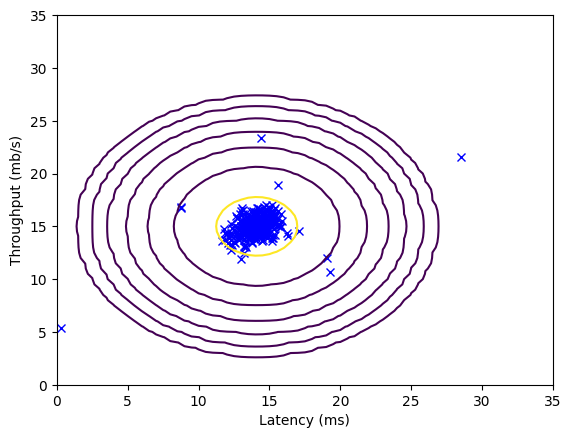

In [8]:
# Visualize Gaussian fit 
visualize_fit(Xval, mu, sigma2)

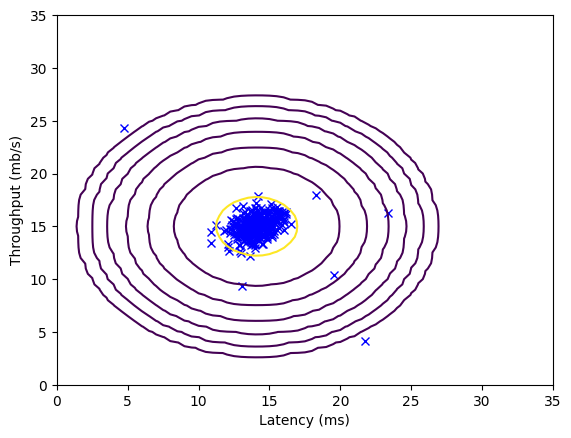

In [9]:

visualize_fit(X, mu, sigma2)

In [10]:
# Load data of higher dimension 
data2 = loadmat('ex8data2.mat')
X = data2['X']
Xval = data2['Xval']
yval = data2['yval'].flatten()
# Estimate Gaussian parameters
mu, sigma2 = estimate_gaussian(X)
p = multivariate_gaussian(X, mu, sigma2)
pval = multivariate_gaussian(Xval, mu, sigma2)
epsilon, f1 = select_threshold(yval, pval)

print(f'Best epsilon found using cross-validation: {epsilon:.2e}')
print(f'Best F1 on Cross Validation Set: {f1:.6f}')
print(f'# Outliers found: {np.sum(p < epsilon)}')

Best epsilon found using cross-validation: 1.38e-18
Best F1 on Cross Validation Set: 0.615385
# Outliers found: 117


C:\Users\devas\AppData\Local\Temp\ipykernel_21864\3994345916.py:12: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp / (tp + fp)
